<a href="https://colab.research.google.com/github/andrey-gl/study2020/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Понятие выборки. Эмпирическая функция распределения и гистограмма

**Определение.** Выборкой $\mathbf{X} = (X_1, . . . , X_n)$ объёма $n$ из распределения $\mathcal{F}$ называется набор из $n$ независимых и одинаково распределённых случайных величин, имеющих распределение $\mathcal{F}$.

**Определение.** Эмпирической функцией распределения, построенной по выборке $\mathbf{X} = (X_1, . . . , X_n)$ объёма $n$, называется случайная
функция $F^*_n:\Omega\times\mathbb{R}\rightarrow\mathbb{R}$: 
$$F^*_n(y) = \frac{1}{n}\sum_{i=1}^nI(X_i<y).$$

Если элементы выборки $X_1, . . . , X_n$ упорядочить по возрастанию на каждом элементарном исходе, получится новый набор случайных величин, называемый вариационным рядом:

$$X_{(1)} \leq . . . \leq X_{(n)}.$$

Соответственно, мы можем построить эмпитическую функцию распределения по вариационному ряду (см. пример ниже).

Если эмпирическая функция распределения – это аналог функции распределения, то аналогом плотности распределения служит гистограмма.

Пусть $A_1, ..., A_n$ – интервалы на прямой, называемые интервалами группировки. Обозначим $v_j$ – чило элементов выборки, попавших в интервал $A_j$:
$$v_j = \sum_{i=1}^n I(X_i \in A_j),$$
 где $n$ – размер выборки.

**Теорема.** Пусть $\mathbf{X} = (X_1, . . . , X_n)$ – выборка объёма $n$ из распределения $\mathcal{F}$ с функцией распределения $F$ и пусть $F^*_n$ – эмпирическая функция распределения, построенная по этой выборке. Тогда для любого $y \in \mathbb{R}$:
1. $F^*_n(y)\stackrel{{\sf P}}{\longrightarrow}F(y)$ для любого $y\in\mathbb{R}$ при $n\rightarrow\infty$ (состоятельность).
2. $EF^*_n(y) = F(y)$ (несмещенность);
3. $DF^*_n(y) = \frac{F(y)(1-F(y))}{n}$;
4. $\sqrt n(F^*_n(y) - F(y))\Rightarrow N_{(0, F(y)(1-F(y))}$ (ассимптотическая нормальность);
5. Величина $nF^*_n(y)$ имеет биноминальное распределение $B_{n, F(y)}$.



**Теорема (Гливенко-Кантелли).** Пусть $\mathbf{X} = (X_1, . . . , X_n)$ – выборка объёма $n$ из распределения $\mathcal{F}$ с функцией распределения $F$ и пусть $F^*_n$ – эмпирическая функция распределения, построенная по этой выборке. Тогда $sup_{y\in\mathbb{R}}|F^*_n(y) - F(y)|\stackrel{{\sf P}}{\longrightarrow}0$  при $n\rightarrow\infty$.

Более того, в теореме сходимость имеет место сходимость почти наверное. Кроме того, если функция распредлеения $F$ непрерывна, скорость сходимости к нулю в теореме Гливенко-Кантелли имеет порядок $\frac{1}{\sqrt n}$.


**Теорема.** Пусть $\mathbf{X} = (X_1, . . . , X_n)$ – выборка объёма $n$ из распределения $\mathcal{F}$ с абсолютно непрерывной функцией распределения $F$. Тогда при $n \rightarrow \infty$ для любого $j = 1, ..., k$:

$$\frac{v_j}{n}\stackrel{\sf P}{\longrightarrow}P(X_1\in A_j).$$

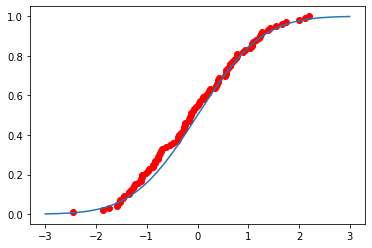

In [ ]:
# Построение эмпирической функции распределения
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 100

xs = np.arange(-3, 3, 0.001)
plt.plot(xs, norm.cdf(xs))

mu, sigma = 0, 1
x = np.random.normal(mu, sigma, N)

x_var = np.sort(x) # вариационный ряд
y = np.arange(1, x.size+1) / x.size 

plt.scatter(x_var, y, color="red")

plt.show()

0.4722007246923706
0.48222832552104367


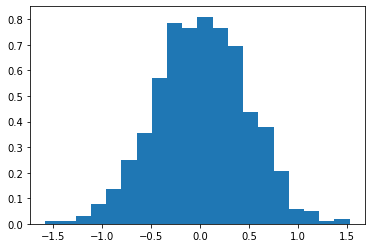

In [ ]:
# Асимптотическая нормальность
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import math


N = 10000
M = 1000
xs = 1
l = 1

a = np.array([])

for _ in range(M):
    x = np.random.exponential(l, N)
    t = 0
    for x_s in x:
        if x_s < xs: t = t + 1
    a = np.append(a, (N**0.5)*(t/N - expon.cdf(xs)))

plt.hist(a, bins = 20, density=True)


print(np.std(a))

print((expon.cdf(xs)*(1-expon.cdf(xs)))**0.5)

plt.show()


#Выборочные моменты

Мы рассмотрели выборочные аналоги функци распределения и плотности. Теперь перейдем в выборочным аналогам моментов:

**Определение.** Оценки для моментов следующие:
1. Выборочным средним называется оценка $\overline{X}  = \frac{1}{n} \sum_{i = 1} ^ n X_i$; 
2. Выборочная дисперсия $S^2 = \frac{1}{n} \sum_{i = 1} ^ n (X_i - \overline{X})^2$. Несмещенная выборочная дисперсия $S^2 = \frac{1}{n-1} \sum_{i = 1} ^ n (X_i - \overline{X})^2$;
3. Выборочный $k$-й момент: $\overline{X^k}  = \frac{1}{n} \sum_{i = 1} ^ n X_i^k$.

**Теорема (свойства выборочного среднего).** Выборочное среднее является состоятельной, несмещенной и ассимптотический нормальной оценкой для математического ожидания:
1. Если $E|X_1| < \infty$, то $\overline{X} \stackrel{{\sf P}}{\longrightarrow} EX_1$;
2. Если $E|X_1| < \infty$, то $E\overline{X} = EX_1$;
3. Если $DX_1 < \infty$, то $\sqrt{n}(\overline{X} - EX_1) \Rightarrow N_{0, DX_1}$.

**Теорема (свойства выборочной дисперсии).** Выборочное среднее является состоятельной, несмещенной в случае $S_o^2$ и ассимптотический нормальной оценкой для математического ожидания:
1. Если $DX_1 < \infty$, то $S^2 \stackrel{{\sf P}}{\longrightarrow} DX_1$ и $S_0^2 \stackrel{{\sf P}}{\longrightarrow} DX_1$;
2. Если $DX_1 < \infty$, то $ES_0^2 = DX_1$;
3. Если $DX_1 < \infty$, то $\sqrt{n}(S^2 - DX_1) \Rightarrow N_{0, D(X_1-EX_1)^2}$.

2.0156637450598214
2.0


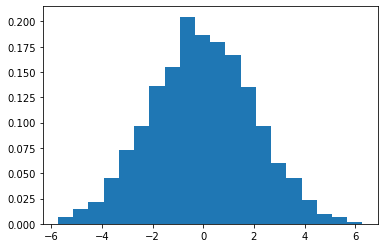

In [ ]:
# Асимптотическая нормальность математического ожидания
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import math


N = 500
M = 1000
xs = 0.2
l = 2

a = np.array([])

for _ in range(M):
    x = np.random.exponential(l, N)
    a = np.append(a, (N**0.5)*(np.mean(x) - expon.mean(scale = 2)))


plt.hist(a, bins = 20, density=True)



print(np.std(a))

print(expon.std(scale = 2))

plt.show()